### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [40]:
data = pd.read_csv('data/coupons.csv')

In [41]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [42]:
missingData = data.isnull().sum()
print(missingData)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


I have observed

3. Decide what to do about your missing data -- drop, replace, other...

In [43]:
# Going to drop the car column due to the large amounts of missing data
data = data.drop(columns=['car'])

In [44]:
# Getting the modes of the columns that contains missing values and replacing the empty values with the mode
# List of columns in dataframe
columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Fill missing values with the mode of each column
for column in columns:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)



In [45]:
# checking for any remaining missing values
missingData = data.isnull().sum()
print(missingData)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [46]:
totalParticipants = data.shape[0]
totalAccepted = (data['Y'] == 1).sum()
proportion = (totalAccepted/totalParticipants)*100
proportion = round(proportion,2)
print(str(proportion)+'% of the total participants chose to accept the coupon')

56.84% of the total participants chose to accept the coupon


<Axes: xlabel='coupon', ylabel='count'>

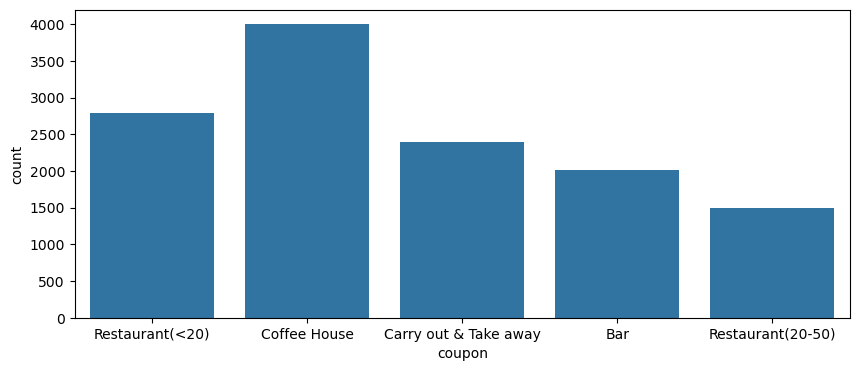

In [47]:
plt.figure(figsize=(10,4))
sns.countplot(x='coupon',data=data)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

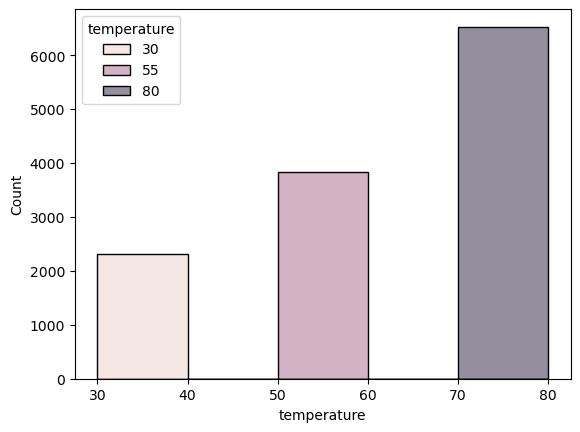

In [48]:
sns.histplot(x='temperature',bins=5,hue='temperature',fill=True,data=data)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [49]:
barDF = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [50]:
# getting the total number of bar coupons available
barShape = barDF.shape[0]

# getting the sum of the accepted coupons
acceptedCoupons = (barDF['Y']==1).sum()
barProportion = (acceptedCoupons/barShape)*100
barProportion = round(barProportion,2)


print(str(barProportion)+'% of the bar coupons were accepted')

41.0% of the bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [51]:
# filtering in the values in the dataframe to compare the acceptance rates of drivers who went to the bar more and less than 3 times
lessThan3 = barDF[(barDF['Bar'].isin(['1~3', 'less1', 'never'])) & (barDF['Y'] == 1)]['Y'].sum()

moreThan3 = barDF[(barDF['Bar'].isin(['4~8', 'gt8'])) & (barDF['Y'] == 1)]['Y'].sum()

# calculating the acceptance rates
lessthan3Acceptance = round(((lessThan3/barShape)*100),2)
morethan3Acceptance = round(((moreThan3/barShape)*100),2)

print('3 or fewer: '+str(lessthan3Acceptance)+'%\nMore than 3: '+str(morethan3Acceptance)+'%')





3 or fewer: 33.42%
More than 3: 7.59%


Analyzing this result, we can see that the drivers who visit the bar less tend to accept the coupon more frequently.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [52]:
# setting the filters for the dataframe
barFilter = ['1~3', '4~8', 'gt8']
ageFilter = ['21', 'below21']

# Calculating the number of drivers above 25 who go to the bar more than once a month
over25 = barDF[(barDF['Bar'].isin(barFilter)) & (~barDF['age'].isin(ageFilter)) & (barDF['Y'] == 1)]['Y'].sum()

# Calculating the number of drivers below 25 who go to the bar more than once a month
under25 = barDF[(barDF['Bar'].isin(barFilter)) & (barDF['age'].isin(ageFilter)) & (barDF['Y'] == 1)]['Y'].sum()

# Calculating the acceptance rates
over25Acceptance = round(((over25 / barShape) * 100), 2)
under25Acceptance = round(((under25 / barShape) * 100), 2)


print('Over 25: '+str(over25Acceptance)+'%\nUnder 25: '+str(under25Acceptance)+'%')


Over 25: 14.48%
Under 25: 5.85%


From this result, I would say that there is a difference as the drivers who are over 25 that go more than once a month tend to accept the coupon more often than those who are younger than 25 by 8.63%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [53]:
# setting up the filtlers for the dataframe
filterColumns1 = ['passanger','occupation','Y','Bar']
filterWords1 = ['Kid(s)','Farming Fishing & Forestry','never','less1',0]

# Filtering the dataframe
noKidPass = (barDF[~barDF[filterColumns1].isin(filterWords1).any(axis=1)])['Y'].sum()

# Filtering the dataframe
filterWords2 = ['Kid(s)','Farming Fishing & Forestry','never','less1']
hasKidPass = (barDF[barDF['passanger'].isin(filterWords2) & barDF['occupation'].isin(filterWords2)&barDF['Bar'].isin(filterWords2)&(barDF['Y']==1)])['Y'].sum()


# Calculating the acceptance rate
noKidAcceptance = round(((noKidPass/barShape)*100),2)
hasKidAcceptance = round(((hasKidPass/barShape)*100),2)



print('No Kid: '+str(noKidAcceptance)+'%\nHas Kid: '+str(hasKidAcceptance)+'%')

No Kid: 19.48%
Has Kid: 0.05%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [54]:
# passengers going to the bar more than once a month with no kids and are not widows
filteroutWords1 = ['widowed','Kid(s)','less1','never',0]
filterColumns = ['maritalStatus','passanger','Bar','Y']

filtered1 = (barDF[~barDF[filterColumns].isin(filteroutWords1).any(axis=1)])['Y'].sum()

# passengers going to the bar more than once a month and are under 30
filteroutWords2 = ['less1','never',0]
filterinWords = ['21','26']
filterColumnOut = ['Bar','Y']
filterColumnIn = ['age']

filtered2 = (barDF[(~barDF[filterColumnOut].isin(filteroutWords2).any(axis=1)) & (barDF[filterColumnIn].isin(filterinWords).any(axis=1))])['Y'].sum()

# passengers who go to cheap restaurants more than 4 times a month and income is less than 50k
filterinWords1 = ['4~8','gt8','$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
filterColumnIn1 = ['RestaurantLessThan20','income']
filtered3 = (barDF[barDF['RestaurantLessThan20'].isin(filterinWords1) & barDF['income'].isin(filterinWords1) &(barDF['Y']==1)])['Y'].sum()

# Calculating acceptance rate

filtered1Acceptance = round(((filtered1/barShape)*100),2)
filtered2Acceptance = round(((filtered2/barShape)*100),2)
filtered3Acceptance = round(((filtered3/barShape)*100),2)

print('No Kid or Widow: '+str(filtered1Acceptance)+'%\nUnder 30: '+str(hasKidAcceptance)+'%\nLess than 50K: '+str(filtered3Acceptance)+'%')

No Kid or Widow: 19.48%
Under 30: 0.05%
Less than 50K: 7.73%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Based on the above observations the majority of the drivers who accepted the bar coupons are those without kids and those who go to the bar more than once a month. We see that the drivers who go to the bar less than 3 times a month are more likely to accept the bar coupons, possibly due to the fact they haven't gone in some time compared to the regular customers. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Now I will analyze the carryout data to see the percentage of people who accept the carryout coupons

In [55]:
# creating the carryout dataframe
carryoutDF = data[data['coupon']=='Carry out & Take away']

In [56]:
# getting the total number of carryout coupons
carryShape = carryoutDF.shape[0]

#first find out the proportion of carry out coupons accepted
carryoutProportion = (carryoutDF['Y']==1).sum()/carryShape
carryoutProportion = round((carryoutProportion*100),2)

print(str(carryoutProportion)+'% of the carry out/takeaway coupons were accepted')

73.55% of the carry out/takeaway coupons were accepted


Showing chart of Age groups

<Axes: xlabel='income', ylabel='Count'>

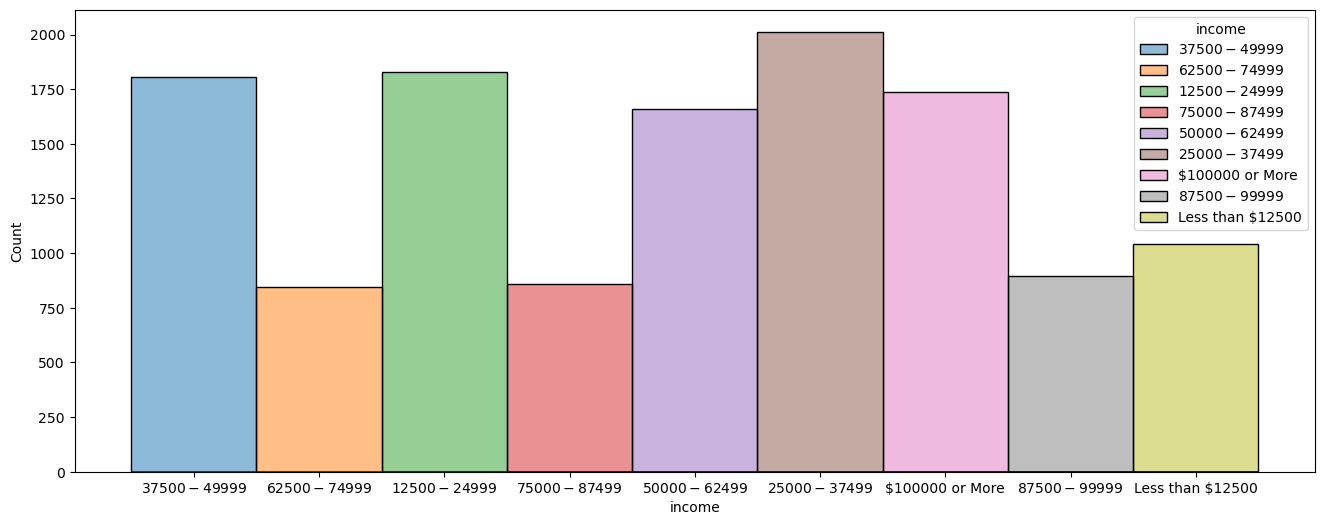

In [57]:
plt.figure(figsize=(16,6))
sns.histplot(x='income',bins=5,hue='income',fill=True,data=data)

We see that the people with income of $25,000 to $37,499 is the majority. 

I will also see what time of day were the users asked about the coupons

<Axes: xlabel='time', ylabel='Count'>

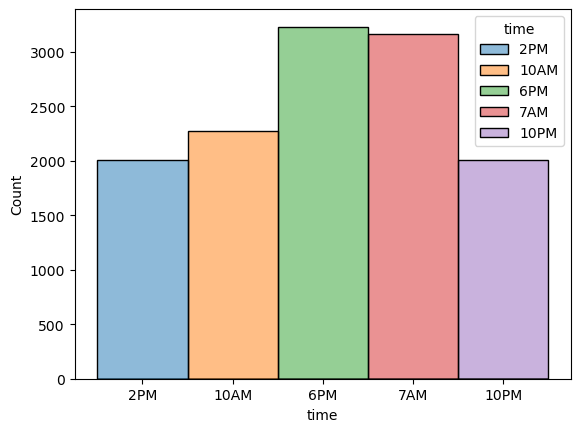

In [58]:
sns.histplot(x='time',bins=5,hue='time',fill=True,data=data)

We see that people are asked mostly in the morning at 7AM or in the evening at 6PM. This is most likely due to them either driving to work
or driving home from work

Observing whether the driver was alone or with passengers

<Axes: xlabel='passanger', ylabel='Count'>

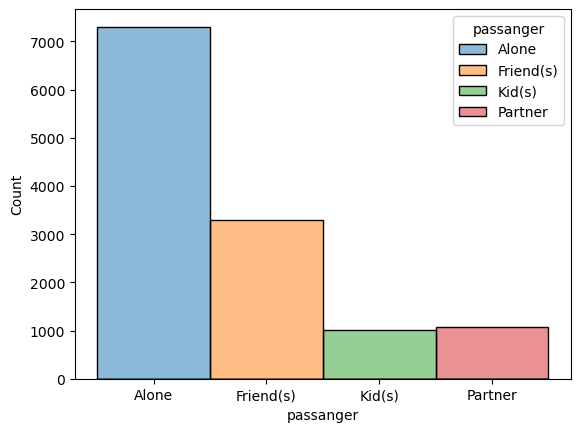

In [59]:
sns.histplot(x='passanger',bins=5,hue='passanger',fill=True,data=data)

We see a huge majority of people driving alone compared to the other options

Seeing the coupon distribution for all drivers

<Axes: xlabel='coupon', ylabel='Count'>

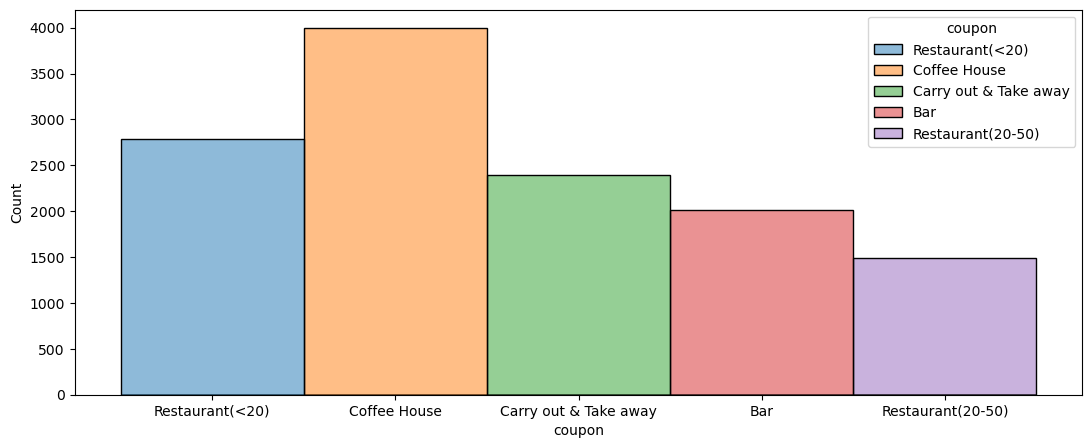

In [60]:
plt.figure(figsize=(13,5))
sns.histplot(x='coupon',bins=5,hue='coupon',fill=True,data=data)

Investigating how gender and kids factor in accepting the coupons

In [61]:
# creating the filter for the dataframe
filterWords = ['Female','Kid(s)',0]
columnFilter = ['passanger','gender','Y']

# filtering dataframe
femalewithKid = (carryoutDF[carryoutDF['passanger'].isin(filterWords) & carryoutDF['gender'].isin(filterWords) &(carryoutDF['Y']==1)])['Y'].sum()
malewithKid = (carryoutDF[~carryoutDF[columnFilter].isin(filterWords).any(axis=1)])['Y'].sum()
femaleOnly = (carryoutDF[(carryoutDF['gender']=='Female')&(carryoutDF['Y']==1)])['Y'].sum()
maleOnly = (carryoutDF[(carryoutDF['gender']=='Male')&(carryoutDF['Y']==1)])['Y'].sum()

# calculating acceptance rate
femaleOnlyAcceptance = round(((femaleOnly/carryShape) *100),2)
maleOnlyAcceptance = round(((maleOnly/carryShape) *100),2)
femaleAcceptance = round(((femalewithKid/carryShape) *100),2)
maleAcceptance = round(((malewithKid/carryShape) *100),2)

print('Female Only: '+str(femaleOnlyAcceptance)+'%\nmaleOnly: '+str(maleOnlyAcceptance)+'% \nFemale with Kid: '+str(femaleAcceptance)+'%\nMale with Kid: '+str(maleAcceptance)+'%')

Female Only: 36.98%
maleOnly: 36.56% 
Female with Kid: 2.67%
Male with Kid: 34.77%


From this observation, I see that Males with children are more likely to accept a carryout coupon.

Investigating how Carryout frequencies along with if the driver is single affects the coupon acceptance percentage

In [62]:
# creating filter for dataframe
notMarriedFilter = ['never','less1','Married partner','Unmarried partner',0]
marriedFilter = ['never','less1','Single','Divorced','Widowed',0]
columnFilter = ['CarryAway','maritalStatus','Y']

# filtering dataframe
notMarried = (carryoutDF[~carryoutDF[columnFilter].isin(notMarriedFilter).any(axis=1)])['Y'].sum()
married = (carryoutDF[~carryoutDF[columnFilter].isin(marriedFilter).any(axis=1)])['Y'].sum()

# calculating acceptance rate
notMarriedAcceptance = round(((notMarried/carryShape)*100),2)
marriedAcceptance = round(((married/carryShape)*100),2)

print('Not Married: '+str(notMarriedAcceptance)+'%\nMarried: '+str(marriedAcceptance)+'%')

Not Married: 27.29%
Married: 35.23%


I see that married drivers are more likely to accept the carryout coupons, possibly due to busy schedules and carry out is  a quick way to get food.

Certain Occupations could also influence the frequency of accepting coupons

In [64]:
# creating filter for dataframe
occupationFilter = ['Unemployed','Student','4~8','gt8',0]
columnFilter = ['occupation','CarryAway','Y']

# filtering dataframe
noJob = (carryoutDF[(carryoutDF['occupation'].isin(occupationFilter)) & (carryoutDF['CarryAway'].isin(occupationFilter)) & (carryoutDF['Y']==1)])['Y'].sum()
hasJob = (carryoutDF[~carryoutDF[columnFilter].isin(occupationFilter).any(axis=1)])['Y'].sum()

# calculating acceptance rate
noJobAcceptance = round(((noJob/carryShape)*100),2)
hasJobAcceptance = round(((hasJob/carryShape)*100),2)


print('No Job: '+str(noJobAcceptance)+'%\nHas Job: '+str(hasJobAcceptance)+'%')

No Job: 8.61%
Has Job: 27.0%


As expected, drivers who already obtained a job are more likely to accept the coupons due to more financial flexibility. The unemployed and students will have a harder time affording the meals even with the coupons

Lastly, the type of weather can have a big affect on whether a driver accepts the coupon or not

In [65]:
# creating weather filters
weatherFilter = ['Snowy','Rainy','4~8','gt8',0]
columnFilter = ['weather','CarryAway','Y']

# filtering dataframe
badWeather = (carryoutDF[(carryoutDF['weather'].isin(weatherFilter)) & (carryoutDF['CarryAway'].isin(weatherFilter)) & (carryoutDF['Y']==1)])['Y'].sum()
goodWeather = (carryoutDF[~carryoutDF[columnFilter].isin(weatherFilter).any(axis=1)])['Y'].sum()


# calculating acceptance rate
badWeatherAcceptance = round(((badWeather/carryShape)*100),2)
goodWeatherAcceptance = round(((goodWeather/carryShape)*100),2)


print('Bad Weather: '+str(badWeatherAcceptance)+'%\nGood Weather: '+str(goodWeatherAcceptance)+'%')

Bad Weather: 8.27%
Good Weather: 29.46%


From this observation, we see that drivers are more likely to accept the coupon during good weather, like when it is sunny outside

Based on my observations, coupon acceptance is reliant on good weather, people having a job. I also found that Men with kids as a passenger
will be more likely to accept the coupon than females and by a small percentage, married drivers are more likely to accept a carryout coupon.